In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel('/content/drive/MyDrive/ChaiCode Full Stack Data Science Cohort/Phase 1 - Statistics for Data Science/CLT_28June_11AM/fraud_data.xlsx')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [4]:
data.shape

(14446, 15)

Population Mean

In [5]:
population_mean = data['amt'].mean()
print('Population mean: ', population_mean)

Population mean:  124.43007337671327


Sample Mean

In [6]:
sample = data['amt'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
print('Sample mean: ', sample_mean)

Sample mean:  119.54582999999998


Impact of sample size on sample mean: As the sample size increases, the sample mean becomes a better estimator of the population mean. This is one of the key ideas of the Central Limit Theorem.

In [7]:
sample_sizes = [10, 50, 100, 500, 1000, 5000, 7000]

sample_means = [data['amt'].sample(n=size, random_state=42).mean() for size in sample_sizes]

for size, mean in zip(sample_sizes, sample_means):
  print(f'Sample Size: {size}, Sample Mean: {mean}')

Sample Size: 10, Sample Mean: 96.85499999999999
Sample Size: 50, Sample Mean: 88.3492
Sample Size: 100, Sample Mean: 81.8355
Sample Size: 500, Sample Mean: 112.06866000000001
Sample Size: 1000, Sample Mean: 119.54582999999998
Sample Size: 5000, Sample Mean: 123.99536800000001
Sample Size: 7000, Sample Mean: 126.52721


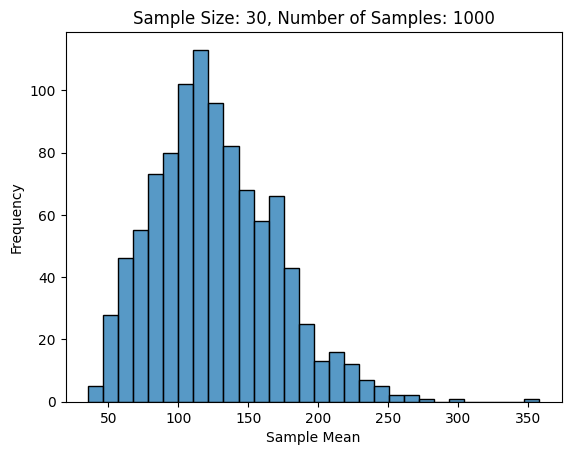

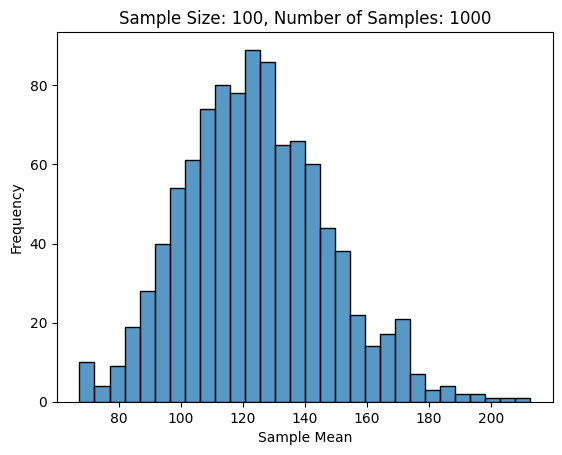

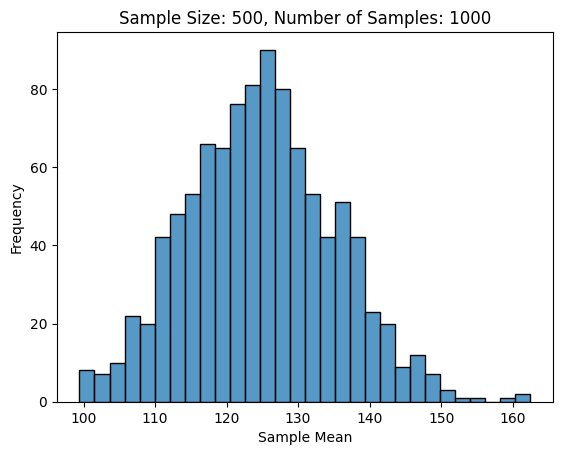

In [10]:
# function definition
def visualize_clt(data, sample_size, num_samples):
  sample_means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(num_samples)]
  sns.histplot(sample_means, bins=30, edgecolor='black')
  plt.title(f'Sample Size: {sample_size}, Number of Samples: {num_samples}')
  plt.xlabel('Sample Mean')
  plt.ylabel('Frequency')
  plt.show()


# function call
visualize_clt(data['amt'], sample_size=30, num_samples=1000)
visualize_clt(data['amt'], sample_size=100, num_samples=1000)
visualize_clt(data['amt'], sample_size=500, num_samples=1000)

Difference between sample mean vs sampling distribution mean

Sample Mean: The mean of a single sample

Sample Distribution Mean: The mean of all the possible sample means which approximates to the population mean

In [12]:
sample_means_distribution  = [np.mean(np.random.choice(data['amt'], size=100)) for _ in range(1000)]
sample_means_distribution

[np.float64(125.72050000000002),
 np.float64(171.95069999999998),
 np.float64(146.36599999999999),
 np.float64(101.7942),
 np.float64(93.37320000000001),
 np.float64(151.4137),
 np.float64(138.5002),
 np.float64(138.0249),
 np.float64(134.58299999999997),
 np.float64(133.23329999999999),
 np.float64(91.45100000000001),
 np.float64(114.08590000000004),
 np.float64(158.8401),
 np.float64(135.9956),
 np.float64(126.1452),
 np.float64(97.17450000000001),
 np.float64(136.33689999999999),
 np.float64(143.1858),
 np.float64(186.18130000000005),
 np.float64(160.987),
 np.float64(123.83769999999998),
 np.float64(114.4533),
 np.float64(113.04610000000001),
 np.float64(95.6035),
 np.float64(142.6925),
 np.float64(115.1445),
 np.float64(148.7131),
 np.float64(122.2233),
 np.float64(115.98980000000002),
 np.float64(84.4777),
 np.float64(170.053),
 np.float64(102.33920000000002),
 np.float64(170.88119999999998),
 np.float64(146.0776),
 np.float64(117.3644),
 np.float64(118.8759),
 np.float64(92.3877

In [13]:
sampling_distribution_mean = np.mean(sample_means_distribution)
print(sampling_distribution_mean)

123.9415962


In [14]:
print(population_mean)

124.43007337671327


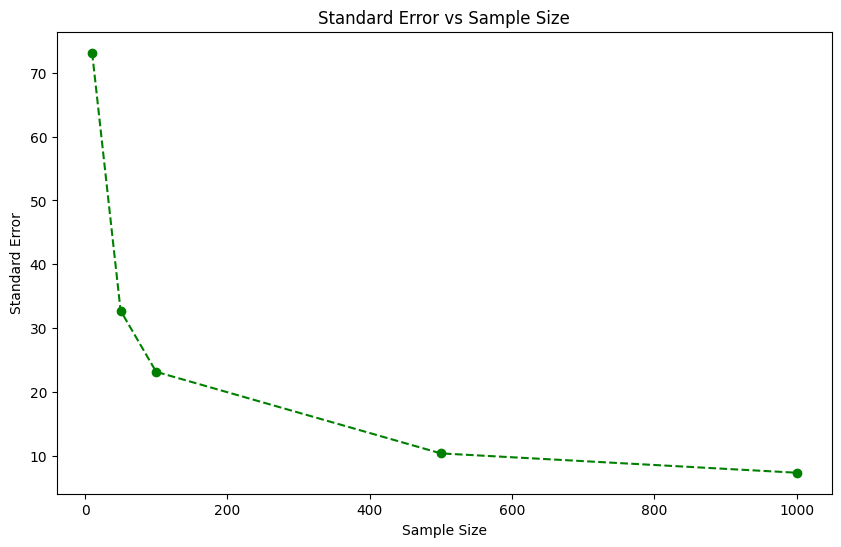

In [16]:
population_std = data['amt'].std()

sample_sizes = [10, 50, 100, 500, 1000]
standard_errors = [population_std/np.sqrt(sample_size) for sample_size in sample_sizes]
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, standard_errors, marker = 'o', linestyle='--', color='g')
plt.title('Standard Error vs Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')
plt.show()